In [ ]:
#importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mount drive to get file from the GDrive folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Dataset

In [ ]:
#read the file
df = pd.read_csv('/content/drive/My Drive/data/melb_data.csv')

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
# Identify the total of null value
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Because there are 4 columns with null values, those columns (Car, BuildingArea, YearBuilt, CouncilArea) will not be considered as parameter in this project.

In [ ]:
#Identify which region is the nearest to the CBD Area with 'Distance' column

nearest_dist = df.groupby(['Regionname'])['Distance'].mean()
nearest_dist

Regionname
Eastern Metropolitan          13.901088
Eastern Victoria              34.209434
Northern Metropolitan          8.078329
Northern Victoria             33.748780
South-Eastern Metropolitan    23.813556
Southern Metropolitan          8.756656
Western Metropolitan          10.104579
Western Victoria              30.753125
Name: Distance, dtype: float64

The nearest region is Northern Metropolitan.

In [ ]:
# Pick data only within region Northern Metropolitan

north_m = df[df['Regionname'] == 'Northern Metropolitan']
north_m.shape

(3890, 21)

In [ ]:
#Identify which type of property is sold in Northern Metropolitan Area
#The property that already sold are those under the methods: S, SP, and SA.

north_m_sold = north_m[(north_m['Method'] == 'S') | (north_m['Method'] == 'SP') | (north_m['Method'] == 'SA')]
north_m_sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3212 entries, 0 to 13574
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         3212 non-null   object 
 1   Address        3212 non-null   object 
 2   Rooms          3212 non-null   int64  
 3   Type           3212 non-null   object 
 4   Price          3212 non-null   float64
 5   Method         3212 non-null   object 
 6   SellerG        3212 non-null   object 
 7   Date           3212 non-null   object 
 8   Distance       3212 non-null   float64
 9   Postcode       3212 non-null   float64
 10  Bedroom2       3212 non-null   float64
 11  Bathroom       3212 non-null   float64
 12  Car            3197 non-null   float64
 13  Landsize       3212 non-null   float64
 14  BuildingArea   1729 non-null   float64
 15  YearBuilt      1960 non-null   float64
 16  CouncilArea    2934 non-null   object 
 17  Lattitude      3212 non-null   float64
 18  Longtit

###Property Sold

In [ ]:
#Identifying type of property that are sold.

north_m_sales = north_m_sold.groupby(['Method', 'Type'])['Method'].count()
north_m_sales.unstack()

Type,h,t,u
Method,,,
S,1995,198,464
SA,12,1,4
SP,321,41,176


**The most sold type is 'h' or housing.**

In [ ]:
# Property h type

north_m_sold_h = north_m_sold[north_m_sold['Type'] == 'h']
north_m_sold_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 0 to 13574
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         2328 non-null   object 
 1   Address        2328 non-null   object 
 2   Rooms          2328 non-null   int64  
 3   Type           2328 non-null   object 
 4   Price          2328 non-null   float64
 5   Method         2328 non-null   object 
 6   SellerG        2328 non-null   object 
 7   Date           2328 non-null   object 
 8   Distance       2328 non-null   float64
 9   Postcode       2328 non-null   float64
 10  Bedroom2       2328 non-null   float64
 11  Bathroom       2328 non-null   float64
 12  Car            2314 non-null   float64
 13  Landsize       2328 non-null   float64
 14  BuildingArea   1186 non-null   float64
 15  YearBuilt      1319 non-null   float64
 16  CouncilArea    2077 non-null   object 
 17  Lattitude      2328 non-null   float64
 18  Longtit

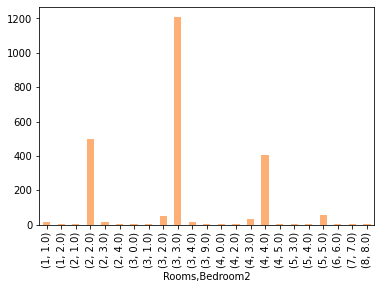

In [ ]:
# Criteria based on Bedroom and Rooms available in the property

north_m_sold_h.groupby(['Rooms', 'Bedroom2'])['Type'].count().plot(kind="bar", color='#FDAF75')

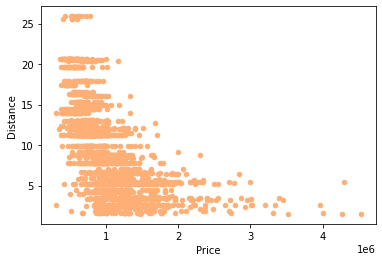

In [ ]:
north_m_sold_h.plot('Price', 'Distance', kind = 'scatter', color='#FDAF75')

###Property Available

In [ ]:
#available property

north_m_avail = north_m[~((north_m['Method'] == 'S') | (north_m['Method'] == 'SP') | (north_m['Method'] == 'SA'))]
north_m_avail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 3 to 13572
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         678 non-null    object 
 1   Address        678 non-null    object 
 2   Rooms          678 non-null    int64  
 3   Type           678 non-null    object 
 4   Price          678 non-null    float64
 5   Method         678 non-null    object 
 6   SellerG        678 non-null    object 
 7   Date           678 non-null    object 
 8   Distance       678 non-null    float64
 9   Postcode       678 non-null    float64
 10  Bedroom2       678 non-null    float64
 11  Bathroom       678 non-null    float64
 12  Car            672 non-null    float64
 13  Landsize       678 non-null    float64
 14  BuildingArea   368 non-null    float64
 15  YearBuilt      420 non-null    float64
 16  CouncilArea    620 non-null    object 
 17  Lattitude      678 non-null    float64
 18  Longtitu

In [ ]:
# Available housing

north_m_avail_h = north_m_avail[north_m_avail['Type'] == 'h']
north_m_avail_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 3 to 13572
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         426 non-null    object 
 1   Address        426 non-null    object 
 2   Rooms          426 non-null    int64  
 3   Type           426 non-null    object 
 4   Price          426 non-null    float64
 5   Method         426 non-null    object 
 6   SellerG        426 non-null    object 
 7   Date           426 non-null    object 
 8   Distance       426 non-null    float64
 9   Postcode       426 non-null    float64
 10  Bedroom2       426 non-null    float64
 11  Bathroom       426 non-null    float64
 12  Car            420 non-null    float64
 13  Landsize       426 non-null    float64
 14  BuildingArea   219 non-null    float64
 15  YearBuilt      240 non-null    float64
 16  CouncilArea    376 non-null    object 
 17  Lattitude      426 non-null    float64
 18  Longtitu

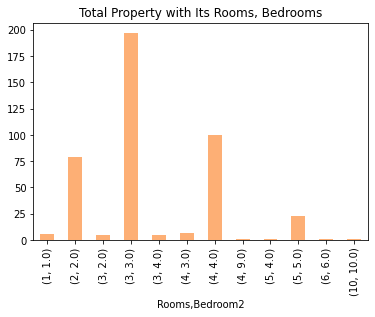

In [ ]:
# Criteria based on Bedroom and Rooms available in the property

north_m_avail_h.groupby(['Rooms', 'Bedroom2'])['Type'].count().plot(kind="bar", title="Total Property with Its Rooms, Bedrooms", color='#FDAF75')

In [ ]:
# Specify the houses with 3 rooms and 3 bedrooms

north_m_avail_r3_br3 = north_m_avail_h[(north_m_avail_h['Rooms'] == 3) & (north_m_avail_h['Bedroom2'] == 3.0)]
north_m_avail_r3_br3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 3 to 13529
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         197 non-null    object 
 1   Address        197 non-null    object 
 2   Rooms          197 non-null    int64  
 3   Type           197 non-null    object 
 4   Price          197 non-null    float64
 5   Method         197 non-null    object 
 6   SellerG        197 non-null    object 
 7   Date           197 non-null    object 
 8   Distance       197 non-null    float64
 9   Postcode       197 non-null    float64
 10  Bedroom2       197 non-null    float64
 11  Bathroom       197 non-null    float64
 12  Car            194 non-null    float64
 13  Landsize       197 non-null    float64
 14  BuildingArea   91 non-null     float64
 15  YearBuilt      103 non-null    float64
 16  CouncilArea    176 non-null    object 
 17  Lattitude      197 non-null    float64
 18  Longtitu

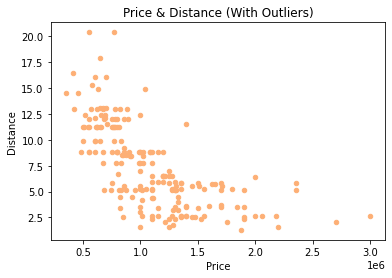

In [ ]:
# Identify relation between Price and Distance

north_m_avail_r3_br3.plot('Price', 'Distance', kind = 'scatter', color='#FDAF75', title='Price & Distance (With Outliers)')

###Outliers for Final Dataset

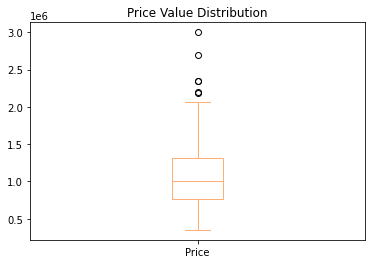

In [ ]:
# Outliers in the Dataset

north_m_avail_r3_br3.plot('Distance', 'Price', kind='box', color='#FDAF75', title='Price Value Distribution')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Text(0, 0.5, 'Distance')

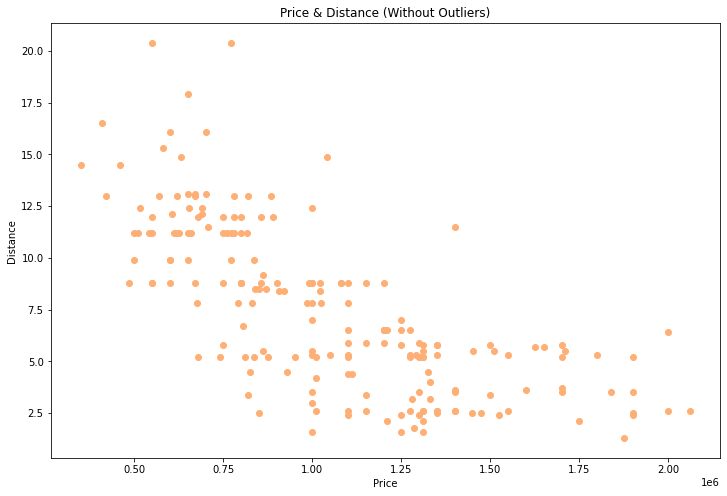

In [ ]:
# Specify outliers from 'Price' column in the final housing data


Q1 = north_m_avail_r3_br3['Price'].quantile(0.25)
Q3 = north_m_avail_r3_br3['Price'].quantile(0.75)
IQR = Q3 - Q1

north_m_avail_r3_br3.loc[north_m_avail_r3_br3['Price'] < (Q1-IQR*1.5), 'Price'] = Q1
north_m_avail_r3_br3.loc[north_m_avail_r3_br3['Price'] > (Q3+IQR*1.5), 'Price'] = Q3

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter('Price', 'Distance', data = north_m_avail_r3_br3, color='#FDAF75')
ax.set_title('Price & Distance (Without Outliers)')
ax.set_xlabel('Price')
ax.set_ylabel('Distance')

In [ ]:
prop_recom = north_m_avail_r3_br3.sort_values(by=(['Distance', 'Price']), ascending=True).head(10)
prop_recom

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9510,East Melbourne,109 Simpson St,3,h,1875000.0,PI,Jellis,17/06/2017,1.3,3002.0,...,1.0,0.0,118.0,177.0,1890.0,Melbourne,-37.81351,144.98804,Northern Metropolitan,3040.0
9825,Carlton,254 Elgin St,3,h,1000000.0,PI,Jellis,24/06/2017,1.6,3053.0,...,1.0,0.0,96.0,80.0,1910.0,Melbourne,-37.79674,144.96563,Northern Metropolitan,6786.0
2533,Fitzroy,431 George St,3,h,1250000.0,PI,Nelson,17/09/2016,1.6,3065.0,...,1.0,1.0,113.0,105.0,1890.0,Yarra,-37.79660,144.98210,Northern Metropolitan,5825.0
2532,Fitzroy,258 Napier St,3,h,2200000.0,VB,Nelson,16/04/2016,1.6,3065.0,...,2.0,1.0,187.0,NaN,NaN,Yarra,-37.80030,144.98060,Northern Metropolitan,5825.0
10438,North Melbourne,357 Flemington Rd,3,h,1285000.0,PI,J,27/05/2017,1.8,3051.0,...,1.0,1.0,170.0,147.0,1990.0,Melbourne,-37.79074,144.94324,Northern Metropolitan,6821.0
13175,Fitzroy,138 Cecil St,3,h,1210000.0,PI,Nelson,23/09/2017,2.1,3065.0,...,1.0,NaN,155.0,NaN,NaN,NaN,-37.79451,144.98208,Northern Metropolitan,5825.0
12497,Fitzroy,101 Kerr St,3,h,1750000.0,VB,Jellis,9/09/2017,2.1,3065.0,...,1.0,NaN,152.0,NaN,NaN,NaN,-37.79662,144.97910,Northern Metropolitan,5825.0
11020,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,...,3.0,1.0,433014.0,NaN,NaN,Yarra,-37.79751,144.98309,Northern Metropolitan,5825.0
9464,Burnley,2/50 Gibdon St,3,h,1100000.0,VB,hockingstuart,17/06/2017,2.4,3121.0,...,2.0,2.0,1212.0,NaN,2010.0,Yarra,-37.82982,145.01038,Northern Metropolitan,438.0
10486,Richmond,74 Hunter St,3,h,1250000.0,VB,Jellis,27/05/2017,2.4,3121.0,...,1.0,1.0,111.0,NaN,NaN,Yarra,-37.82137,145.00512,Northern Metropolitan,14949.0


In [ ]:
prop_recom.to_csv('final_recom.csv', index=True)

##Graphic

[Text(0.5, 1.0, 'Distance of The Property and The Price')]

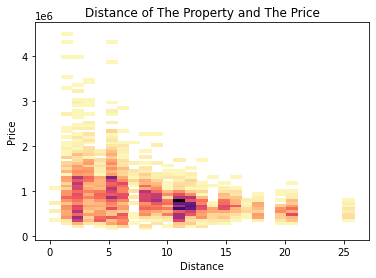

In [ ]:
#Identify relation between 'Distance' and 'Price' for the Northern Metropolitan Area

sns.histplot(data=north_m, x = 'Distance', y = 'Price', cmap='magma_r').set(title='Distance of The Property and The Price')

[Text(0.5, 1.0, 'Distance of The Property and The Price')]

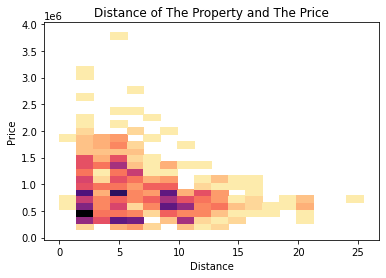

In [ ]:
#Identify relation between 'Distance' and 'Price' for property available in Northern Metropolitan Area

sns.histplot(north_m_avail, x = 'Distance', y = 'Price', cmap='magma_r').set(title='Distance of The Property and The Price')

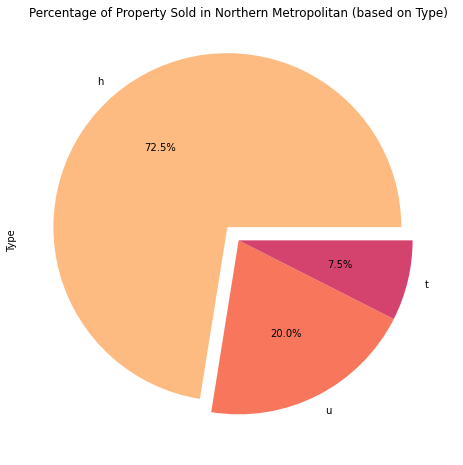

In [ ]:
# Percentage of Property Sold

colors = sns.color_palette('magma_r')

fig, ax = plt.subplots(figsize=(12,8))
explode = (0.1, 0, 0)
north_m_sold['Type'].value_counts().plot(kind='pie', autopct='%.1f%%', colors=colors, explode=explode)
plt.title('Percentage of Property Sold in Northern Metropolitan (based on Type)')
plt.show()

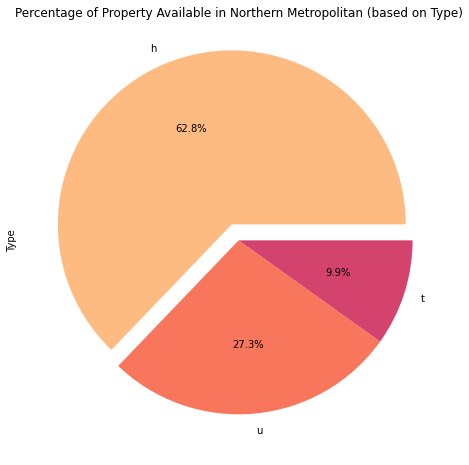

In [ ]:
# Percentage of Property Available

colors = sns.color_palette('magma_r')

fig, ax = plt.subplots(figsize=(12,8))
explode = (0.1, 0, 0)
north_m_avail['Type'].value_counts().plot(kind='pie', autopct='%.1f%%', colors=colors, explode=explode)
plt.title('Percentage of Property Available in Northern Metropolitan (based on Type)')
plt.show()